# Naive Bayes Exam

This dataset comes from the University of California, Irvine's massive archive of Machine Learning Datasets. 

The Wine Quality Dataset that focuses on the Portuguese "Vinho Verde" Wine. The  datasets for white wine has 4898 entries over 

12 features. The features are:

•	1 - fixed acidity

•	2 - volatile acidity

•	3 - citric acid

•	4 - residual sugar

•	5 - chlorides

•	6 - free sulfur dioxide

•	7 - total sulfur dioxide

•	8 - density

•	9 - pH
•	10 - sulphates

•	11 - alcohol

•	12 - quality (score between 0 and 10)



# 1. Load the libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2.Importing the dataset:

In [3]:
Wine_data = pd.read_csv("Wine_data.csv")
Wine_data.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   alcohol  quality  
0      8.8        6  
1      9.5        6

# Extracting the independent variable X and dependent variable Y

In [4]:
X =  Wine_data.drop("quality", axis=1)
Y =  Wine_data.pop("quality")


# 3.Visualize the data:

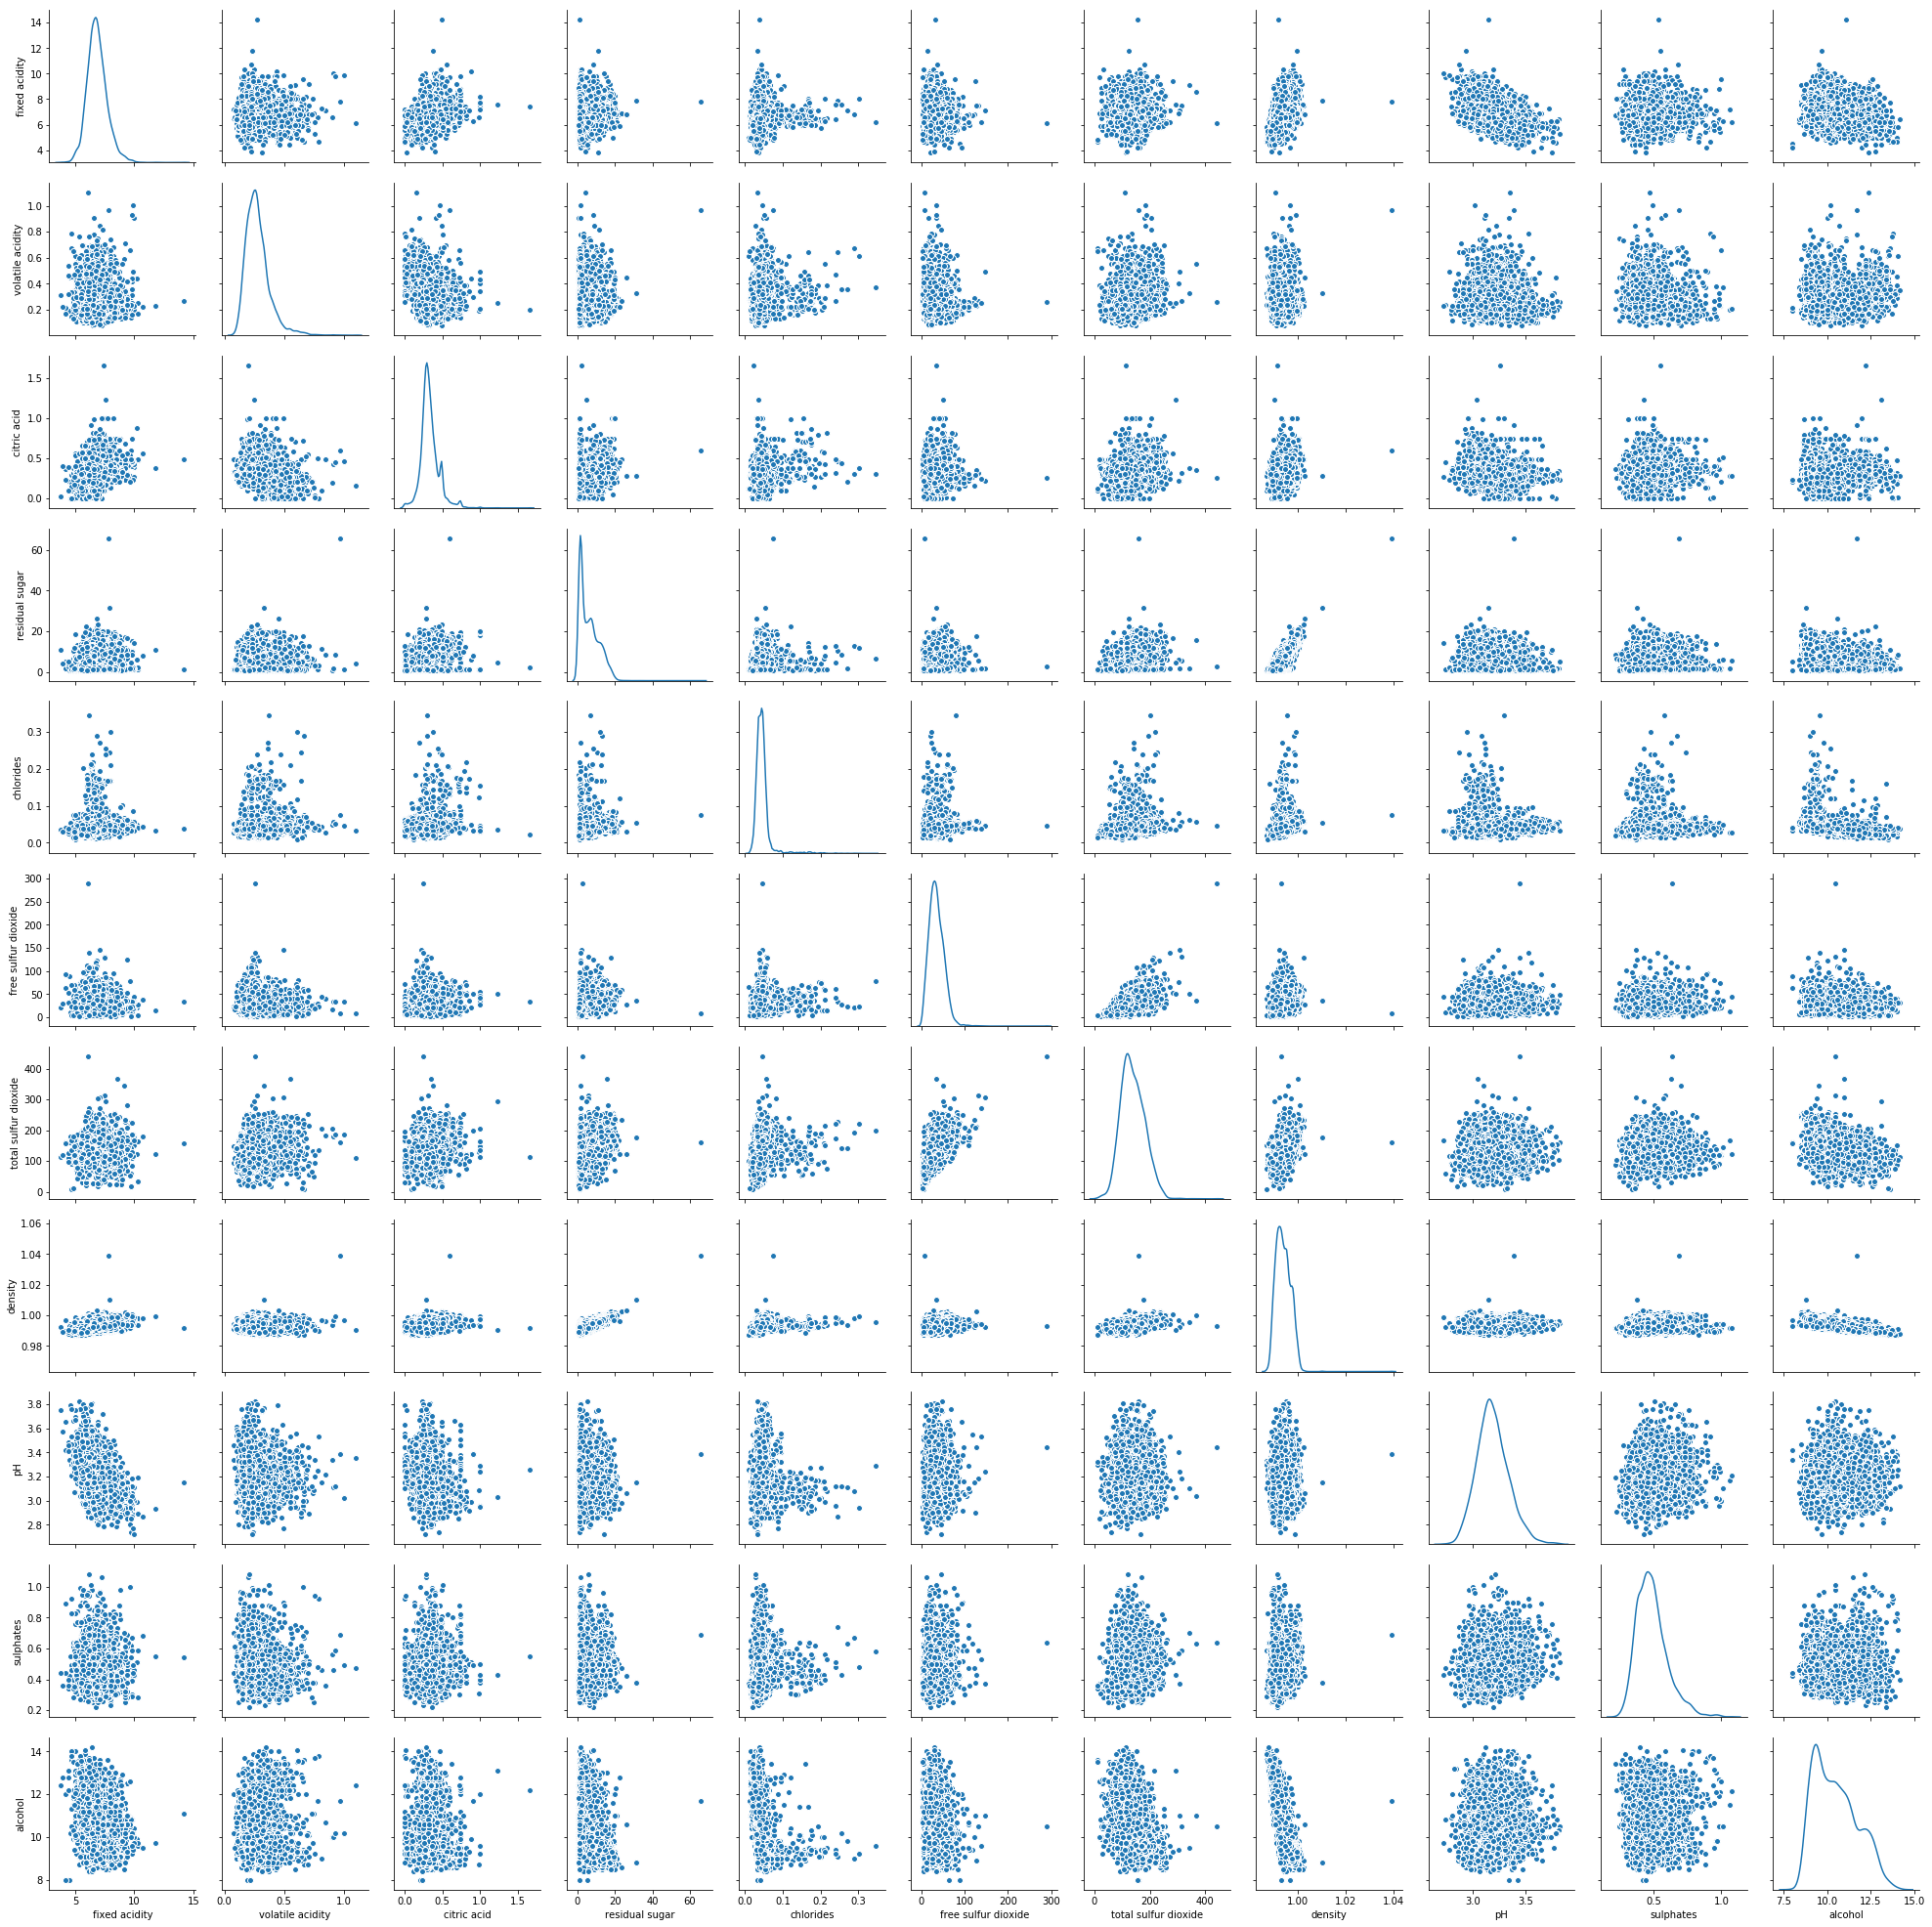

In [5]:
sns.pairplot(Wine_data,diag_kind="kde")

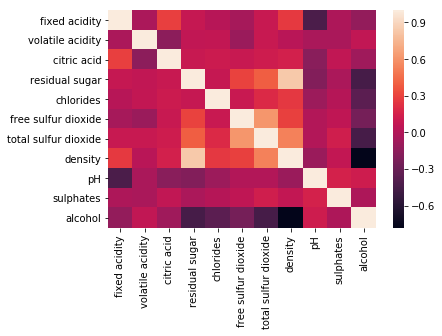

In [6]:
sns.heatmap(Wine_data.corr())

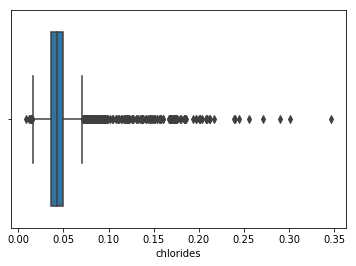

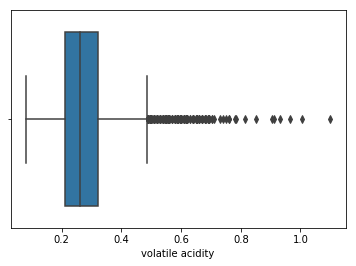

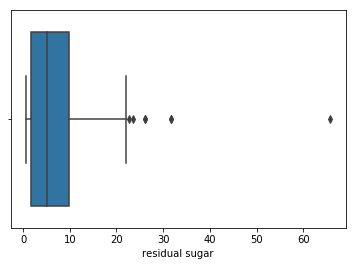

In [28]:

sns.boxplot(x=Wine_data['chlorides'])
plt.show()

sns.boxplot(x=Wine_data['sulphates'])
plt.show()
sns.boxplot(x=Wine_data['density'])
plt.show()
sns.boxplot(x=Wine_data['pH'])
plt.show()
sns.boxplot(x=Wine_data['citric acid'])
plt.show()

sns.boxplot(x=Wine_data['fixed acidity'])
plt.show()
sns.boxplot(x=Wine_data['volatile acidity'])
plt.show()
sns.boxplot(x=Wine_data['residual sugar'])
plt.show()
sns.boxplot(x=Wine_data['free sulfur dioxide'])
plt.show()
sns.boxplot(x=Wine_data['total sulfur dioxide'])
plt.show()


# Do we need to do outlier treatment? What is the most apt method for this?


1. Box PLOT

In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

Above definition suggests, that if there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes. Let’s try and see it ourselves.

2.Discover outliers with mathematical function:

Z-Score-:
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

3.IQR score:

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles,

IQR = Q3 − Q1.

In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box 
plot on the data.

# 4.Split the data into train and test set:

In [7]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 1/3, 
                                                     random_state = 0)


C:\Users\Name\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 5.Feature Scaling:

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)


# 6.G_NB to train set:

In [27]:

from sklearn.naive_bayes import GaussianNB
G_NB = GaussianNB()

G_NB.fit(X_train,Y_train)

GaussianNB(priors=None)

# 7.Predict the model:

In [10]:
Y_pred = G_NB.predict(X_test)
Y_pred

array([6, 5, 6, ..., 7, 6, 6], dtype=int64)

# 8.Vistualize the train set result:

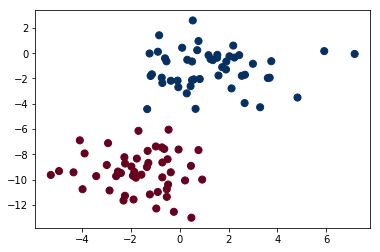

In [12]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='RdBu');

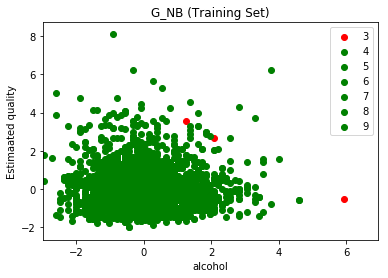

In [23]:
from matplotlib.colors import ListedColormap
X_set,Y_set = X_train,Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max() + 1 ,step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,0].max() + 1 ,step = 0.01))
#
#plt.contourf(X1,X2,G_NB.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape)#,
            #alpha = 0.75, cmap = ListedColormap(("blue","yellow")))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0],X_set[Y_set == j,1],
                c = ListedColormap(("red","green"))(i),label = j)
plt.title("G_NB (Training Set)")
plt.xlabel("alcohol")
plt.ylabel("Estimaated quality")
plt.legend()
plt.show()

# 9.Vistualize the test set result:

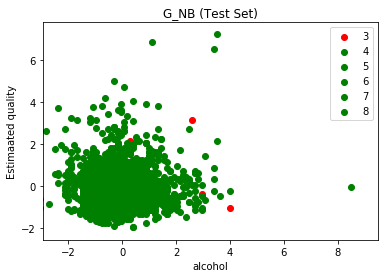

In [24]:
from matplotlib.colors import ListedColormap
X_set,Y_set = X_test,Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max() + 1 ,step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,0].max() + 1 ,step = 0.01))
#plt.contourf(X1,X2,G_NB.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            #alpha = 0.75, cmap = ListedColormap(("blue","yellow")))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0],X_set[Y_set == j,1],
                c = ListedColormap(("red","green"))(i),label = j)
plt.title("G_NB (Test Set)")
plt.xlabel("alcohol")
plt.ylabel("Estimaated quality")
plt.legend()
plt.show()

# 10.Evaluation the model:

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print("accuracy_score G_NB:",accuracy_score(Y_test,Y_pred))

             precision    recall  f1-score   support

          3       0.17      0.33      0.22         9
          4       0.34      0.24      0.28        67
          5       0.53      0.47      0.50       499
          6       0.49      0.42      0.45       705
          7       0.38      0.66      0.48       297
          8       0.00      0.00      0.00        56

avg / total       0.46      0.45      0.45      1633

[[  3   3   0   2   1   0]
 [  2  16  20  22   6   1]
 [  6  16 233 201  43   0]
 [  7  10 151 293 243   1]
 [  0   1  28  69 197   2]
 [  0   1   4  16  35   0]]
accuracy_score G_NB: 0.4543784445805266
